In [1]:
from sklearn.decomposition import PCA, KernelPCA, NMF
from sklearn.manifold import Isomap, TSNE
import umap
import numpy as np

from src.Utils import save_results, get_means
from src.ExistingAlgorithms import max_value, area, sklearn_available
# from src.ParametricUMAP import load_pumap
from src.GaussianMixture import gaussian_mixture

IDX = 4
SIZE = 150
TIME = np.arange(SIZE)
STYLE = 'src/custom_linux.mplstyle' 
# STYLE = 'src/custom_windows.mplstyle'
LATEX = True

PATH_LD = 'src/Results/Low Dimension'
PATH_DATA = '/home/nicolasdc/Documents/Datasets/Photon-Number-Classification/NIST'
PATH_RESULTS = 'src/Results'


data_poisson = np.load(f'{PATH_DATA}/poisson_train.npy')[:,:SIZE]
data_train = np.load(f'{PATH_DATA}/uniform_train.npy')[:,:SIZE]
data_test = np.load(f'{PATH_DATA}/uniform_test.npy')[:,:SIZE]
db_train = np.load(f'{PATH_DATA}/db_test.npy')
db_test = np.load(f'{PATH_DATA}/db_test.npy')
expected_prob = np.load(f'{PATH_DATA}/uniform_expected_prob.npy')

### Max Value

In [2]:
X_l_MAX = max_value(data_test, filtering=True)

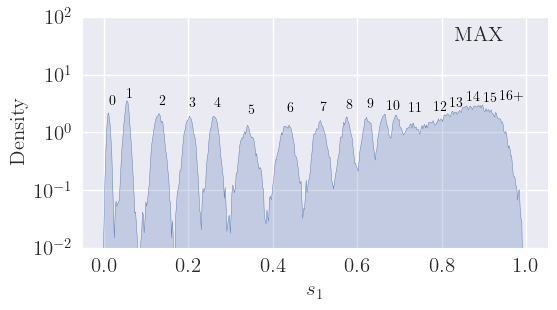

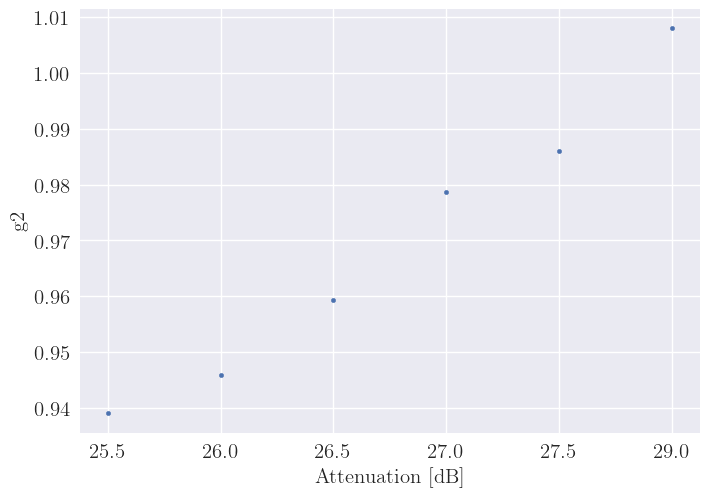

In [3]:
name_method = 'MAX'
gm = gaussian_mixture(X_l_MAX,
                      data_test,
                      means_init = get_means(name_method),
                      number_cluster = 17,
                      tol = 1e-4,
                      cluster_iter = 10,
                      info_sweep = 0,
                      plot_sweep = True,
                      dpi = 100,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = False,
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

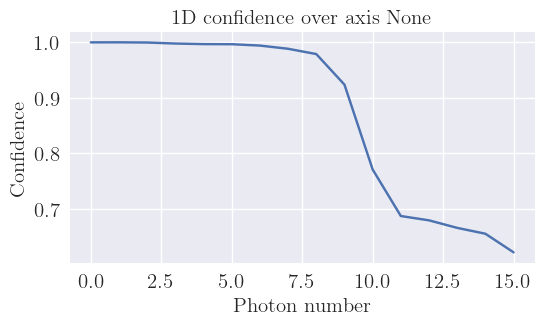

In [4]:
gm.plot_confidence_1d(expected_prob=expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Area

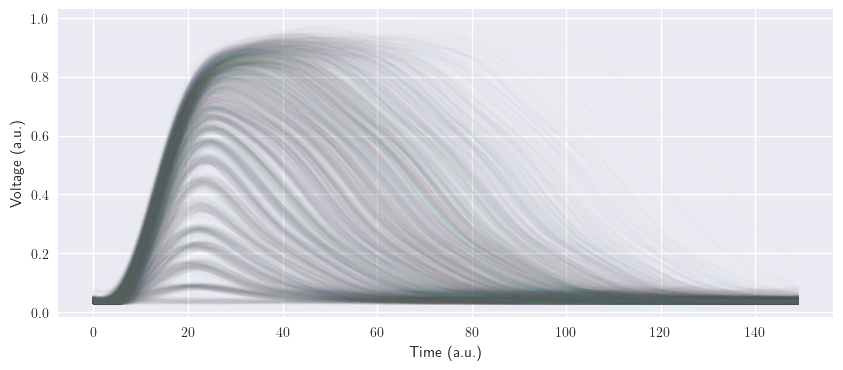

In [5]:
X_l_AREA  = area(data_test[:,:150], filtering = True, plot_filter = True, threshold = 0.03, critical_frequency = 0.1)

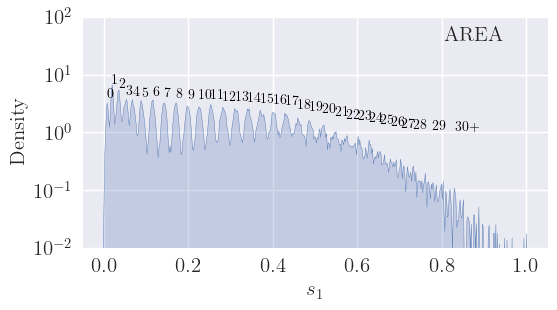

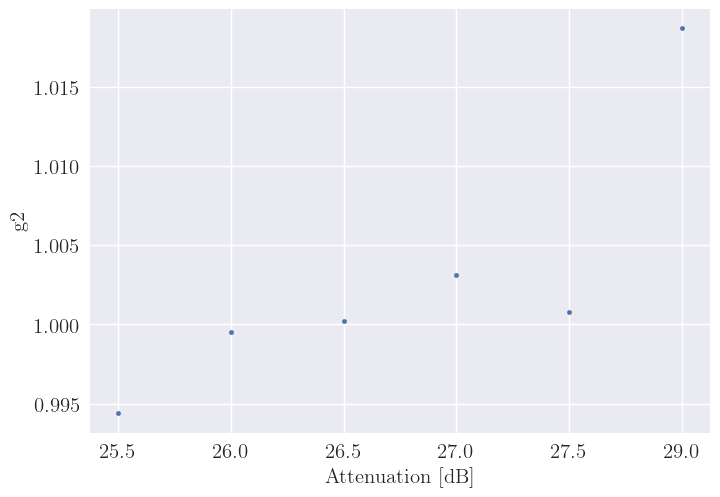

In [6]:
name_method = 'AREA'
gm = gaussian_mixture(X_l_AREA,
                      data_test,#[condition],
                      number_cluster = 31,
                      cluster_iter = 3,
                      means_init = get_means(name_method, PATH_RESULTS),
                      tol = 1e-4,
                      info_sweep = 0,
                      plot_sweep = True,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

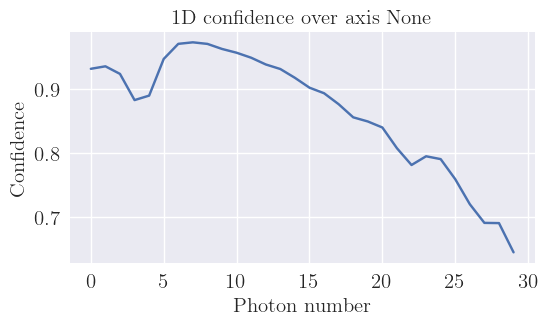

In [7]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Principal Component Analysis (PCA)

In [8]:
X_l_PCA = sklearn_available(data_train, data_test, PATH_LD, PCA, n_components=1)

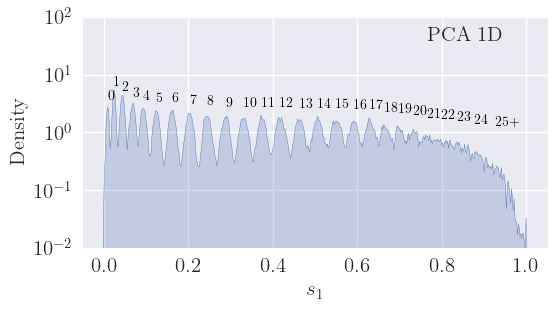

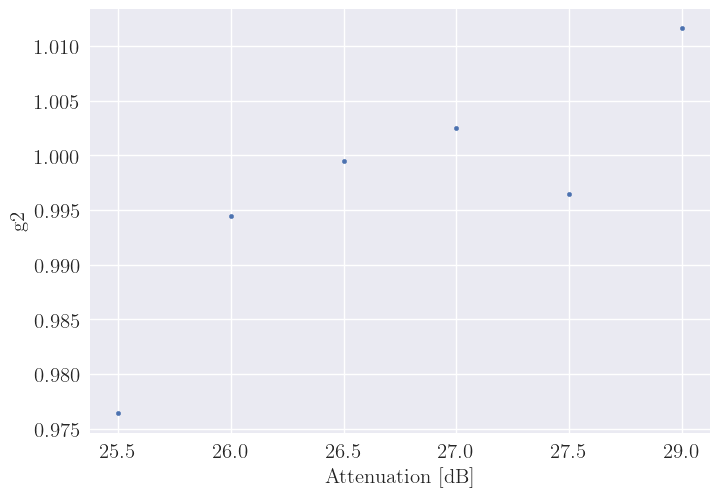

In [9]:
name_method = 'PCA 1D'
gm = gaussian_mixture(X_l_PCA,
                      data_test,
                      number_cluster = 26,
                      cluster_iter = 5,
                      means_init = get_means(name_method, PATH_RESULTS),
                      tol = 1e-4,
                      info_sweep = 0,
                      plot_sweep = False,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.03,
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

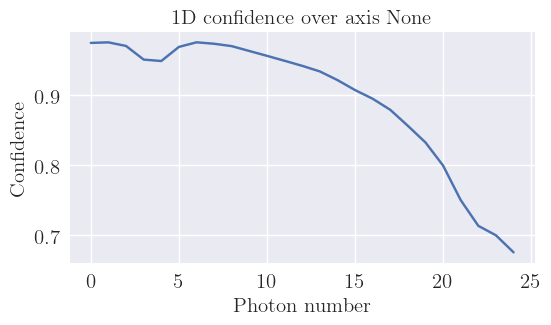

In [10]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

In [11]:
X_l_PCA = sklearn_available(data_train, data_test, PATH_LD, PCA, n_components = 2)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


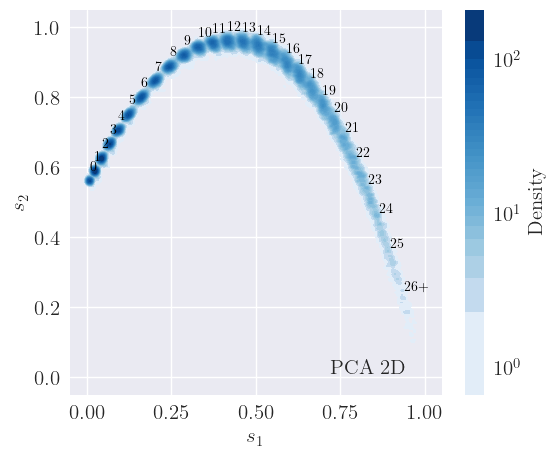

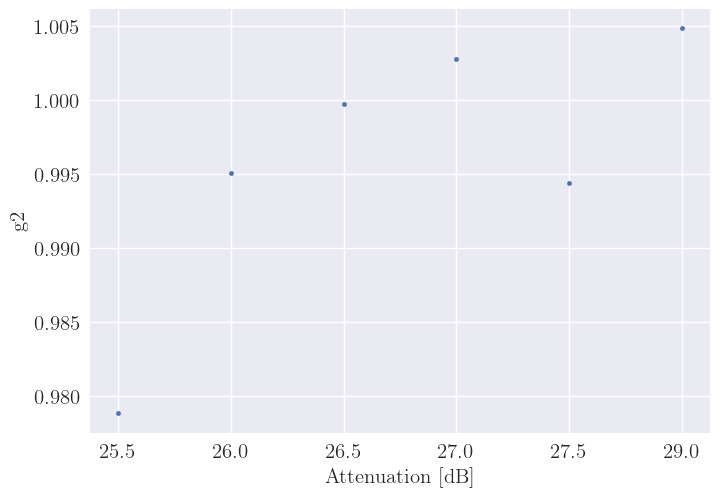

In [12]:
name_method = 'PCA 2D'
gm = gaussian_mixture(X_l_PCA,
                      data_test,
                      number_cluster = 27,
                      cluster_iter = 5,
                      means_init = get_means(name_method, PATH_RESULTS),
                      tol = 1e-4,
                      width_plot = 6,
                      height_plot = 5,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.1,
                plot_gaussians = False,
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

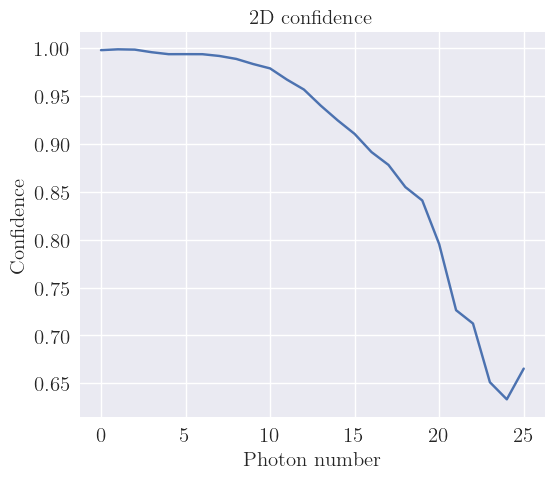

In [13]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Kernel PCA (Radial basis function)

In [14]:
X_l_KPCA_RBF = sklearn_available(data_train, data_test, PATH_LD, KernelPCA, n_components = 2, kernel="rbf", gamma = 0.5) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


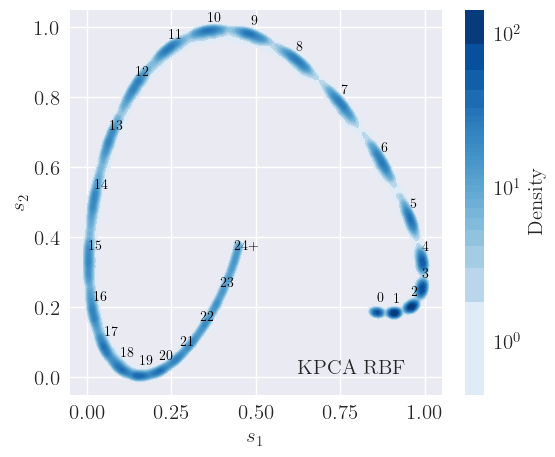

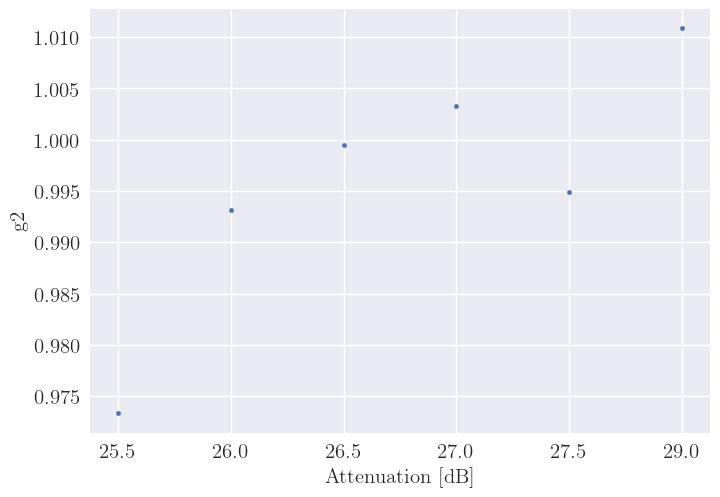

In [15]:
name_method = 'KPCA RBF'
gm = gaussian_mixture(X_l_KPCA_RBF,
                      data_test,
                      number_cluster = 25,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      info_sweep = 0,
                      plot_sweep = True,
                      width_plot = 6,
                      height_plot = 5,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

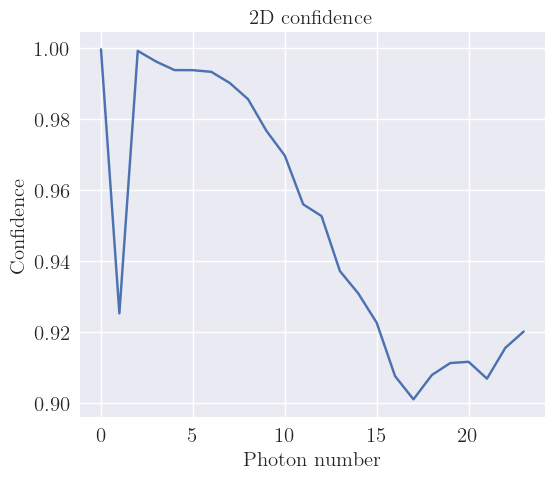

In [16]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Kernel PCA (Sigmoid)

In [17]:
X_l_KPCA_S = sklearn_available(data_train, data_test, PATH_LD, KernelPCA,n_components=2,kernel="sigmoid",gamma=0.01) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


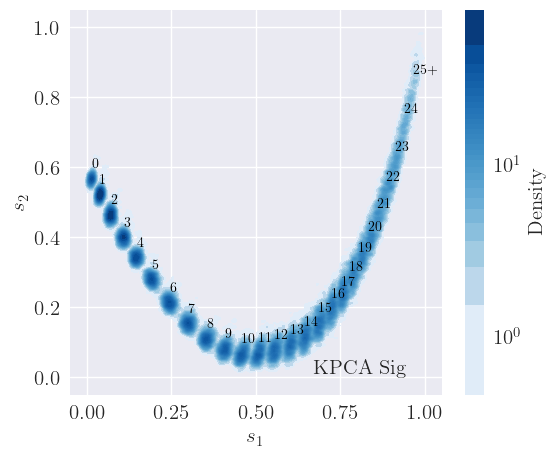

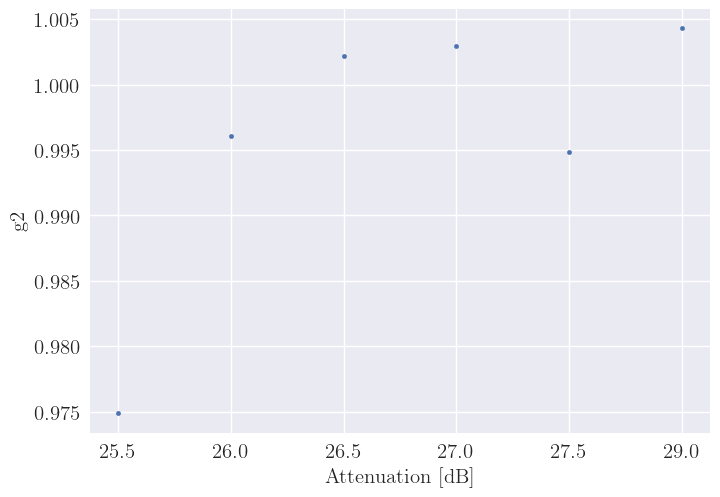

In [18]:
name_method = 'KPCA Sig'
gm = gaussian_mixture(X_l_KPCA_S,
                      data_test,
                      number_cluster = 26,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 5,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

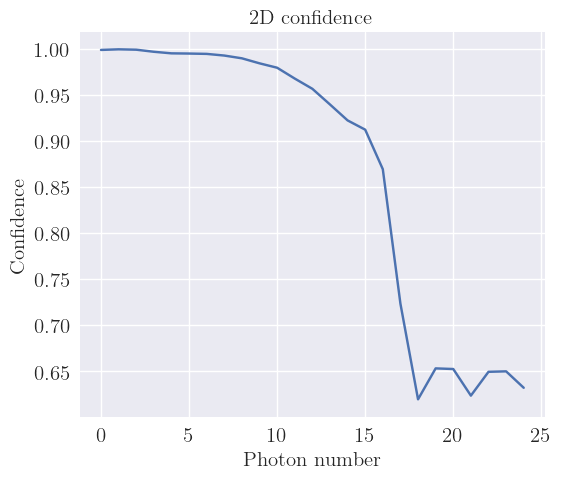

In [19]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Kernel PCA (Cosine)

In [20]:
X_l_KPCA_C = sklearn_available(data_train, data_test, PATH_LD, KernelPCA,n_components=2,kernel="cosine",gamma=0.01) 

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


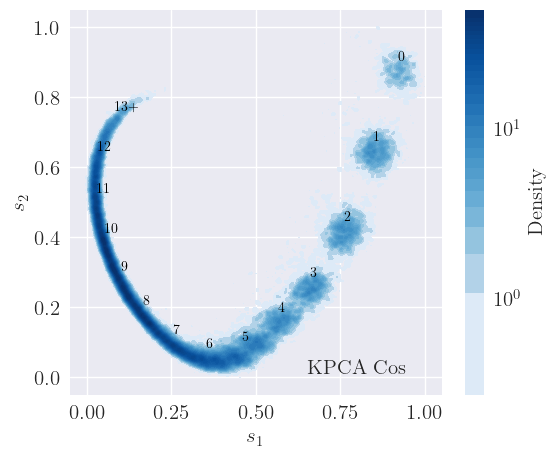

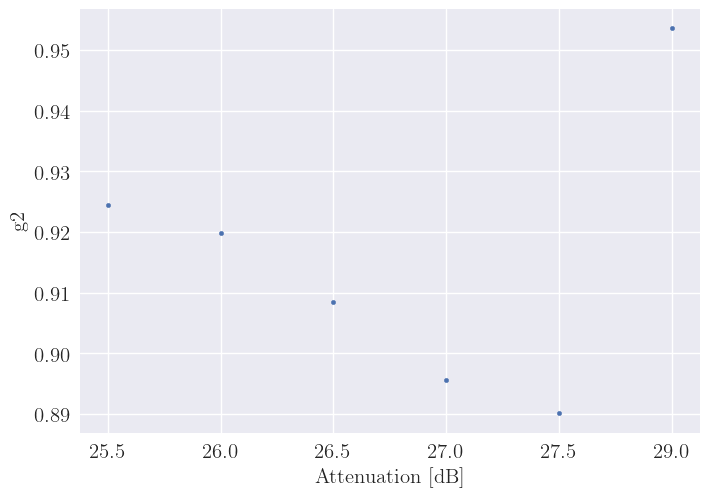

In [21]:
name_method = 'KPCA Cos'
gm = gaussian_mixture(X_l_KPCA_C,
                      data_test,
                      number_cluster = 14,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 5,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

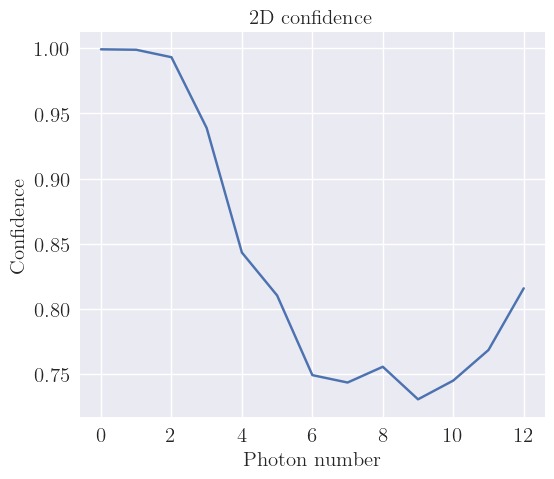

In [22]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### t-distributed Stochastic Neighbor Embedding (t-SNE)

In [23]:
X_l_tSNE = sklearn_available(data_train, data_test, PATH_LD, TSNE,n_components=2, perplexity = 450)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


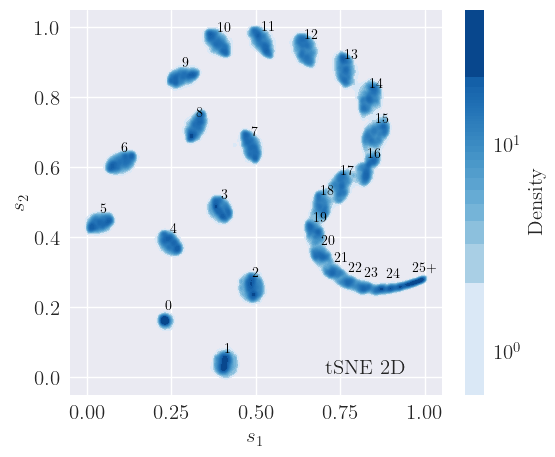

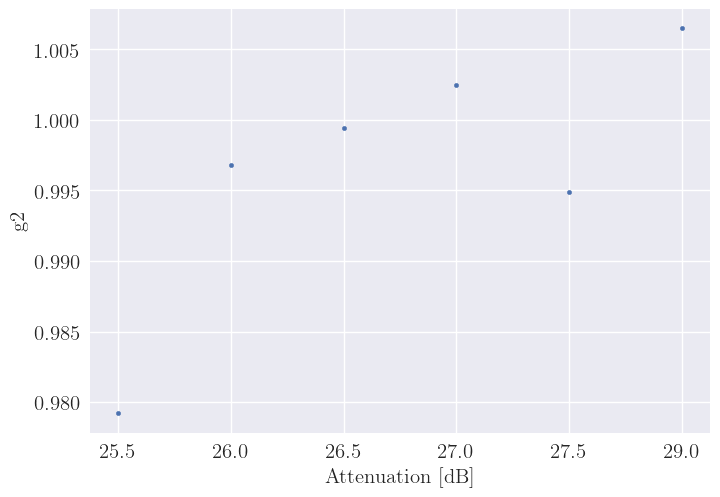

In [24]:
#%config InlineBackend.figure_formats=['svg']
name_method = 'tSNE 2D'
gm = gaussian_mixture(X_l_tSNE,
                      data_test,
                      number_cluster = 26,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 5,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

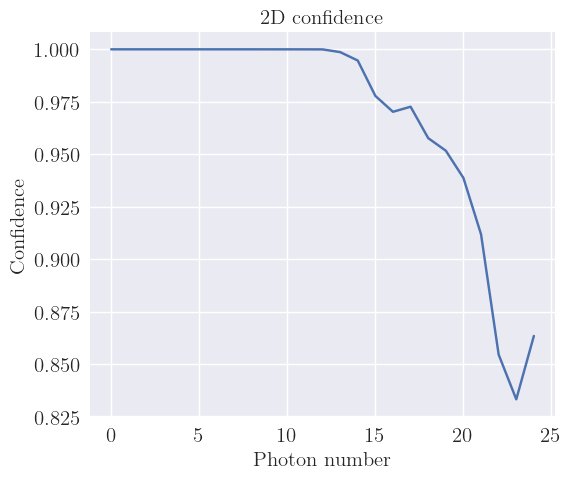

In [25]:
gm.plot_confidence_2d(expected_prob = expected_prob) 
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

In [26]:
X_l_tSNE = sklearn_available(data_train, data_test, PATH_LD, TSNE,n_components=1, perplexity = 450)

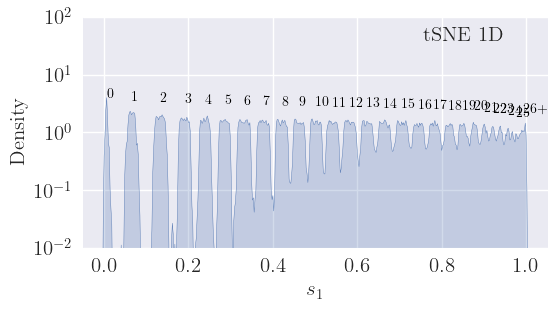

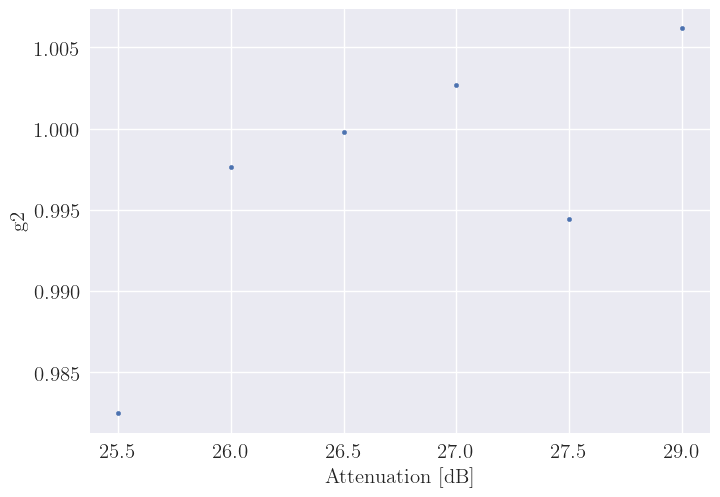

In [27]:
name_method = 'tSNE 1D'
gm = gaussian_mixture(X_l_tSNE,
                      data_test,
                      number_cluster = 27,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

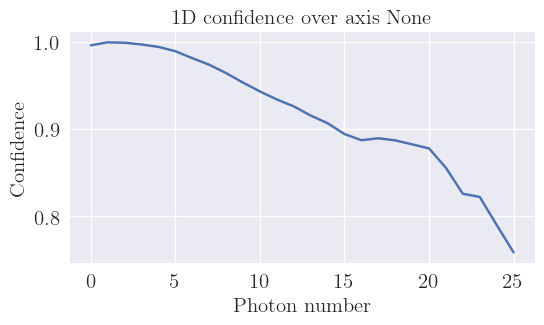

In [28]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

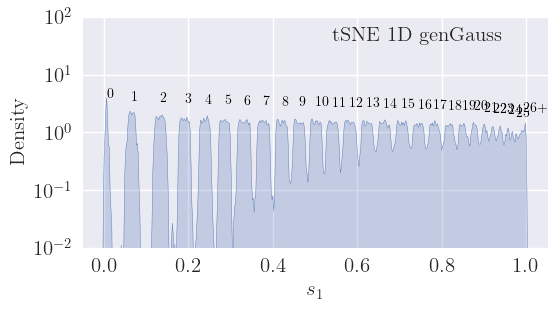

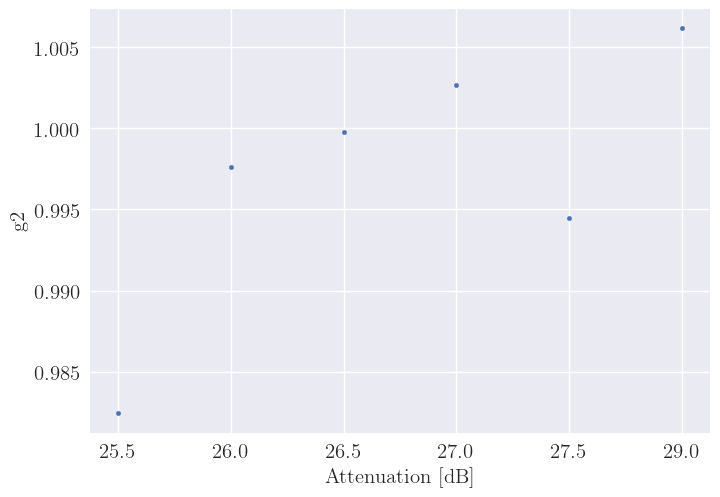

In [29]:
#%config InlineBackend.figure_formats=['svg']
name_method = 'tSNE 1D genGauss'
gm = gaussian_mixture(X_l_tSNE,
                      data_test,
                      number_cluster = 27,
                      cluster_iter = 5,
                      tol = 1e-4,
                      means_init = get_means(name_method, PATH_RESULTS),
                      info_sweep = 0,
                      plot_sweep = True,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

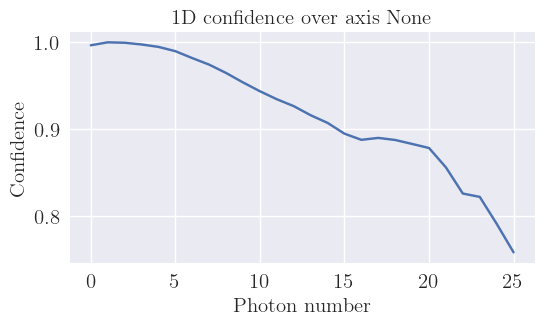

In [30]:
gm.plot_confidence_1d(expected_prob = expected_prob) 
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### UMAP

In [31]:
X_l_UMAP = sklearn_available(data_train, data_test, PATH_LD+'/umap1d', umap.UMAP, '1000.npy', n_components=1, n_neighbors=1000)

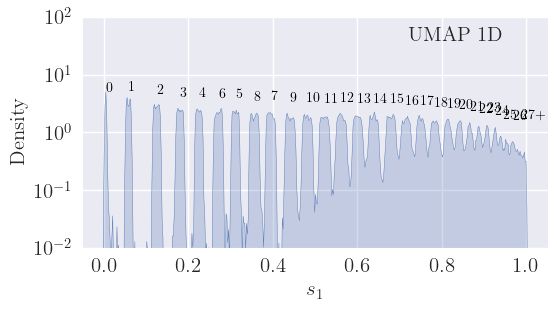

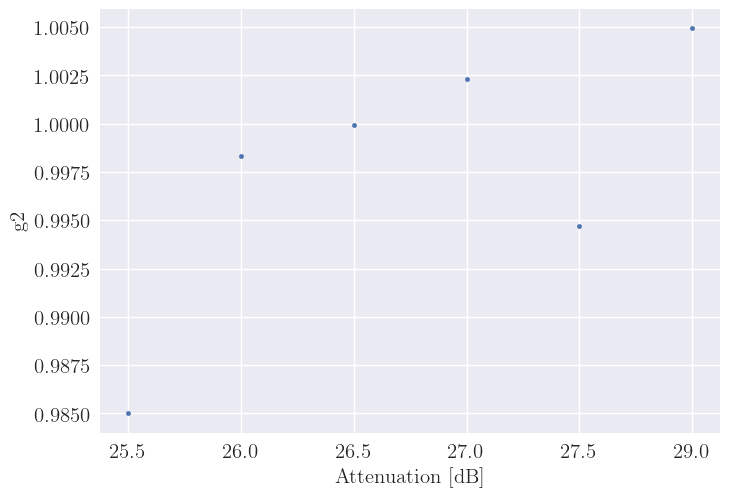

In [32]:
name_method = 'UMAP 1D'
gm = gaussian_mixture(X_low = X_l_UMAP,
                      X_high = data_test,
                      number_cluster = 28,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-4,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

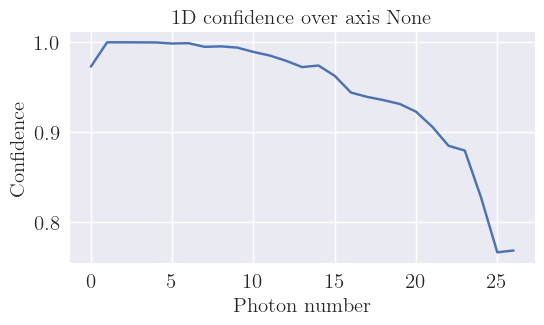

In [33]:
gm.plot_confidence_1d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

In [34]:
X_l_UMAP = sklearn_available(data_train, data_test, PATH_LD+'/umap2d', umap.UMAP, '700.npy',n_components=2, n_neighbors=700)

/home/nicolasdc/anaconda3/envs/ML/lib/python3.12/site-packages/seaborn/distributions.py:1176: UserWarning: Log scale: values of z <= 0 have been masked
  cset = contour_func(


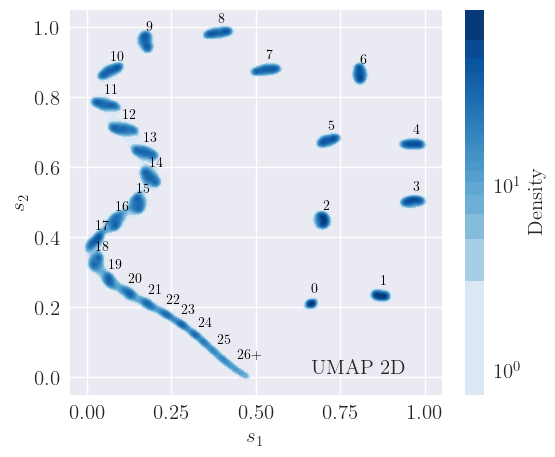

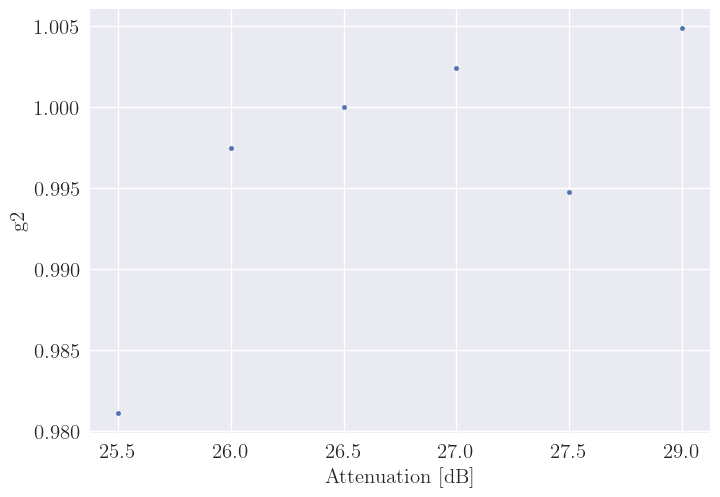

In [35]:
name_method = 'UMAP 2D'
gm = gaussian_mixture(X_low = X_l_UMAP,
                      X_high = data_test,
                      number_cluster = 27,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      width_plot = 6,
                      height_plot = 5,
                      tol = 1e-4,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.1, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

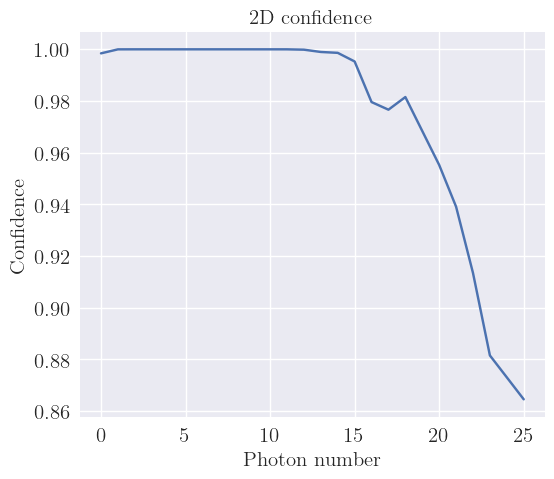

In [36]:
gm.plot_confidence_2d(expected_prob = expected_prob)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Non-Negative Matrix Factorization (NMF)

In [37]:
X_l_NMF = sklearn_available(data_train, data_test, PATH_LD, NMF,n_components=1, max_iter=400, solver='mu', beta_loss='kullback-leibler', tol=1e-10)

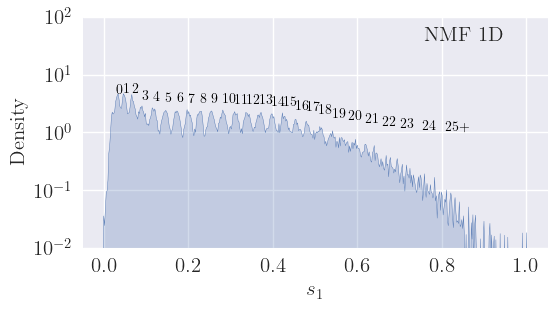

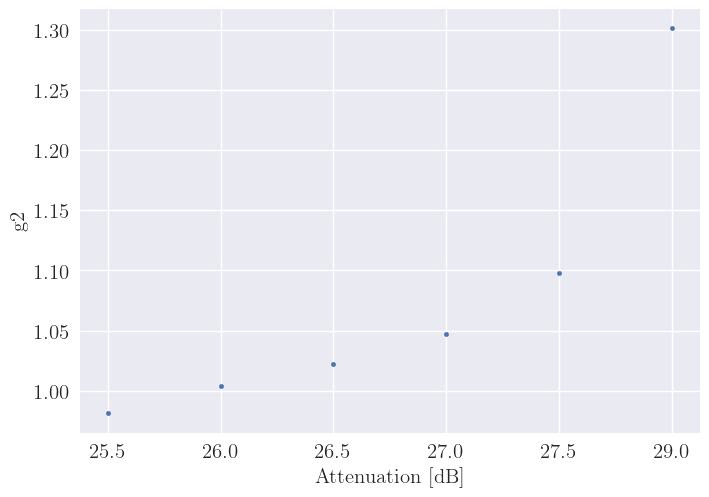

In [38]:
name_method = 'NMF 1D'
gm = gaussian_mixture(X_low = X_l_NMF,
                      X_high = data_test,
                      number_cluster = 26,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-4,
                      info_sweep = 0,
                      plot_sweep = True,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

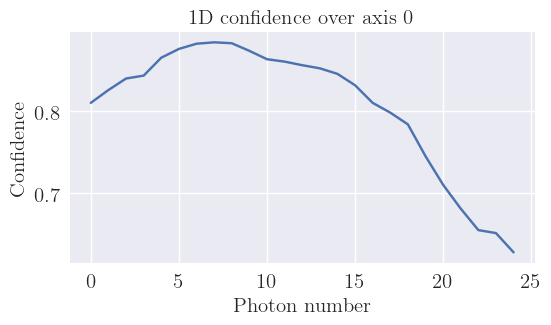

In [39]:
gm.plot_confidence_1d(expected_prob = expected_prob, axis=0)
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)

### Isomap

In [40]:
X_l_ISO = sklearn_available(data_train, data_test, PATH_LD, Isomap, n_neighbors=15, n_components=1, eigen_solver="arpack")

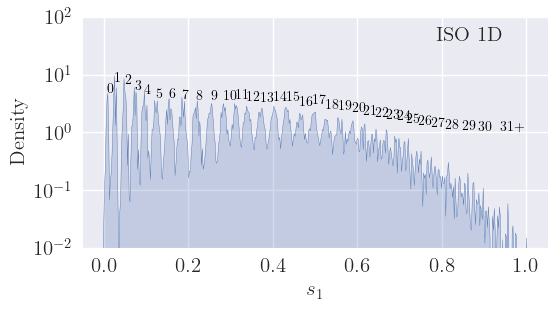

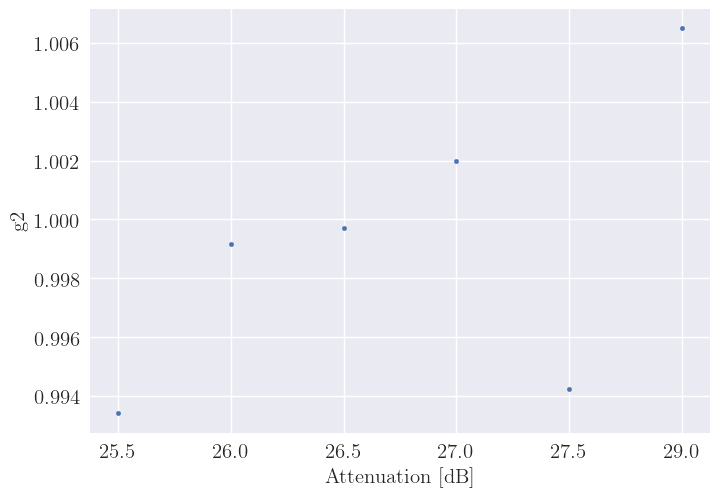

In [41]:
name_method = 'ISO 1D'
gm = gaussian_mixture(X_low = X_l_ISO,
                      X_high = data_test,
                      number_cluster = 32,
                      cluster_iter = 5,
                      means_init = get_means(name_method, path = PATH_RESULTS),
                      tol = 1e-4,
                      info_sweep = 0,
                      plot_sweep = True,
                      style = STYLE,
                      latex = LATEX)

gm.plot_density(bw_adjust = 0.03, 
                plot_gaussians = False, 
                text = name_method,
                save_path = f'{PATH_RESULTS}/Density')
gm.plot_g2(db_test)

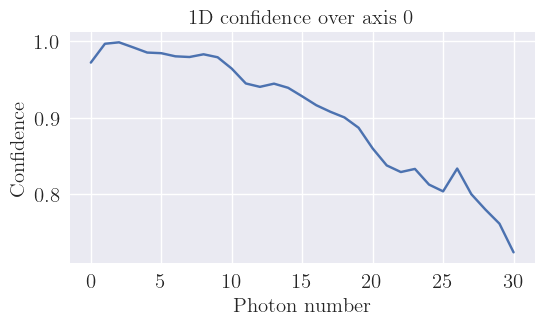

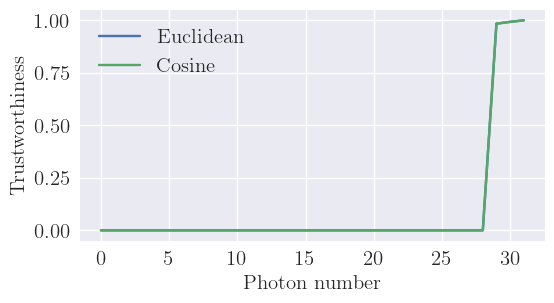

In [42]:
gm.plot_confidence_1d(expected_prob = expected_prob, axis=0)
gm.plot_trustworthiness()
save_results(gm = gm, name_method = name_method, path = PATH_RESULTS)